<a href="https://colab.research.google.com/github/zeinabmohamed/HistopathologicCancerDetection/blob/master/apply_Perceptron_algorithm_final_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive

List all My drive sub dir's


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
import numpy as np
import imageio
import matplotlib.pylab as plt
import sklearn.metrics as sm
import seaborn as sb
import pandas

Prepare Features and labels

In [0]:
 # x:   train_matrix
 # y:   train_label_matrix
 # W:   Weight
 # l_r: learning rate
 # Iterations: number of Iterations

train_matrix = pandas.read_csv("drive/My Drive/histopathologic-cancer-detection/train_6000.csv", header=None, index_col = False)
Y = train_matrix.iloc[0:4800,0]#Get only y Lables
y = np.array(Y)
X = train_matrix.iloc[0:4800,1:3073]#Get only input Features
X = np.hstack((X,np.ones((len(X),1))))#Add Ones as Bias to features
W = np.zeros((3073))# Initiate weight for your input features


Training Module

In [0]:
#Implement Unit Step Activation Function
def ActivationFunc(X,W):
  z = np.dot(X, W)
  y_pred = np.zeros((len(X)))
  counter = 0
  for i in z:
    
    if i >= 0:
      y_pred[counter] = 1
    else:
      y_pred[counter] = 0
    counter += 1

  return y_pred

#Implement Cost(Error) Function 
def Error(X,W):
  e = y-ActivationFunc(X,W)
  E = e**2
  SSE = np.sum(E)
  return SSE

#Implement Gradient Descent Function
def gradient_descent(X,y,W,L_R,Iterations):
  Errors = np.zeros((Iterations,1))
    
  for i in range(Iterations): 
    W += L_R*np.dot(X.T,(y-ActivationFunc(X,W)))
    Errors[i] =  Error(X,W)
  return (Errors,W)

Optimum Weights= [ -12794.4  310136.6  189100.4 ... -263596.8 -118967.7  -29450.5] 



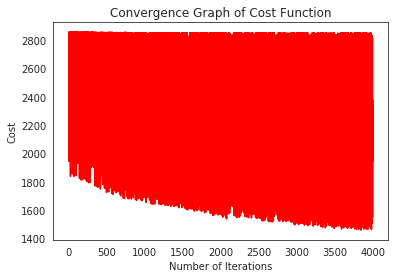

In [0]:
#Initiate Training Module
Iterations = 4000
L_R = 0.1
(Errors,W) = gradient_descent(X,y,W,L_R,Iterations)
print("Optimum Weights=", W, "\n")

#Plot Cost Function Graph
plt.figure()
sb.set_style('white')
plt.plot(range(len(Errors)), Errors, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

Testing Module

Accuraccy=61.5%


Text(0.5, 15.0, 'Predicated Label')

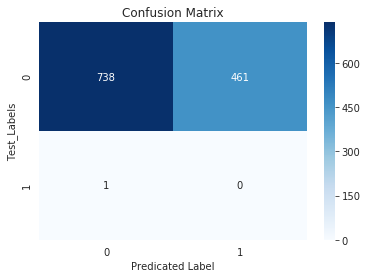

In [0]:
Y = train_matrix.iloc[4800:6000,0]
Test_Labels = np.array(Y)
X = train_matrix.iloc[4800:6000,1:3073]
X = np.hstack((X,np.ones((len(X),1))))

# Predict New amples
def predict(X,W):
    return ActivationFunc(X,W)
pred_labels = predict(X,W)

#Calculate Accuracy 
acc = sm.accuracy_score(pred_labels,Test_Labels)
print('Accuraccy='+str(acc*100)+'%')

#Plot Confusion Matrix 
cm = sm.confusion_matrix(pred_labels,Test_Labels)
sb.heatmap(cm, cmap="Blues", annot=True,fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Test_Labels')
plt.xlabel('Predicated Label')